In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [7]:
def visualize_clusters(combined_vectors, labels, kc):
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2)
    tsne_vectors = tsne.fit_transform(combined_vectors)

    # Visualize the clusters using scatter plot
    plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=labels)
    plt.scatter(kc[:,0], kc[:,1], color = 'r', marker='*' )
    plt.title("Cluster Visualization")
    plt.show()

def create_elbow_plot(combined_vectors):
    # Calculate the within-cluster sum of squares (WCSS) for a range of k values
    k_range = range(2, 100)
    wcss = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(combined_vectors)
        wcss.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.plot(k_range, wcss)
    plt.title("Elbow Plot")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    plt.show()
    
def calculate_cohesion(data, labels):
    cohesion_scores = []
    for cluster_label in np.unique(labels):
        cluster_data = data[labels == cluster_label]
        pairwise_distances = np.linalg.norm(cluster_data[:, np.newaxis] - cluster_data, axis=2)
        average_distance = np.mean(pairwise_distances)
        cohesion_scores.append(average_distance)
    return cohesion_scores

def calculate_separation(data, labels):
    separation_scores = []
    for cluster1_label in np.unique(labels):
        cluster1_data = data[labels == cluster1_label]
        for cluster2_label in np.unique(labels):
            if cluster1_label != cluster2_label:
                cluster2_data = data[labels == cluster2_label]
                pairwise_distances = np.linalg.norm(cluster1_data[:, np.newaxis] - cluster2_data, axis=2)
                average_distance = np.mean(pairwise_distances)
                separation_scores.append(average_distance)
    return separation_scores


In [8]:
with open('title_vectors.pkl', 'rb') as f:
    title_vectors = pickle.load(f)

with open('abstract_vectors.pkl', 'rb') as f:
    abstract_vectors = pickle.load(f)

In [11]:
title_embeddings = np.array(title_vectors)
abstract_embeddings = np.array(abstract_vectors)

# Combine the title and abstract embeddings
combined_embeddings = np.vstack((title_embeddings, abstract_embeddings))

AttributeError: 'csr_matrix' object has no attribute 'vstack'

In [10]:
# Perform iterative clustering with silhouette score as its metric
silhouettes = []
cluster_centers_list = []
ks = range(2, 11)  # Specify the range of k values to evaluate

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combined_embeddings)
    silhouettes.append(silhouette_score(combined_embeddings, kmeans.labels_))
    cluster_centers_list.append(kmeans.cluster_centers_)

# Find the optimal number of clusters based on silhouette score
best_k = ks[silhouettes.index(max(silhouettes))]

# Obtain y_predicted and cluster_centers for the optimal number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(combined_embeddings)
y_predicted = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

ValueError: setting an array element with a sequence.

In [ ]:
# Evaluate the clustering using silhouette score, cohesion, and separation
silhouette_avg = silhouette_score(combined_embeddings, kmeans.labels_)
cohesion_avg = calculate_cohesion(combined_embeddings, kmeans.labels_)
separation_avg = calculate_separation(combined_embeddings, kmeans.labels_)

print("Silhouette score:", silhouette_avg)
print("Cohesion:", cohesion_avg)
print("Separation:", separation_avg)

Silhouette score: 0.53313035
Cohesion: [6.5575047, 0.0]
Separation: [12.154635, 12.154635]


In [ ]:
kc = kmeans.cluster_centers_


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


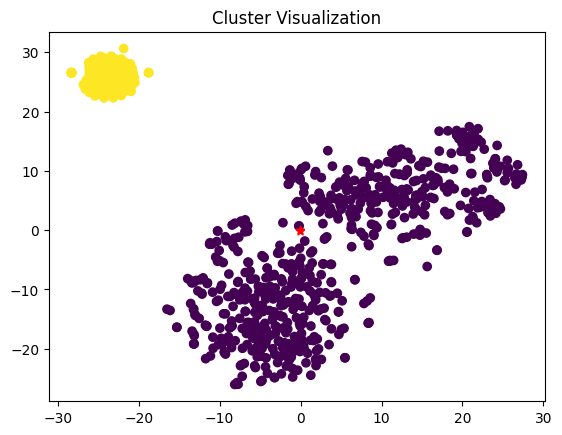

In [ ]:
# Visualize the clusters
visualize_clusters(combined_embeddings, kmeans.labels_, kc)

# Create the elbow plot
create_elbow_plot(combined_embeddings)

In [ ]:
def recluster(data, n_clusters, n_iterations=10):
    best_inertia = float("inf")
    best_labels = None
    best_cluster_centers = None

    for _ in range(n_iterations):
        kmeans = KMeans(n_clusters=n_clusters, n_init=50)  # Increase n_init for more robust results
        kmeans.fit(data)
        inertia = kmeans.inertia_

        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = kmeans.labels_
            best_cluster_centers = kmeans.cluster_centers_

    return best_labels, best_cluster_centers, best_inertia


Refined Silhouette score: 0.53313035
Refined Cohesion: [6.5575047, 0.0]
Refined Separation: [12.154635, 12.154635]
Refined Inertia: 14749.4375


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


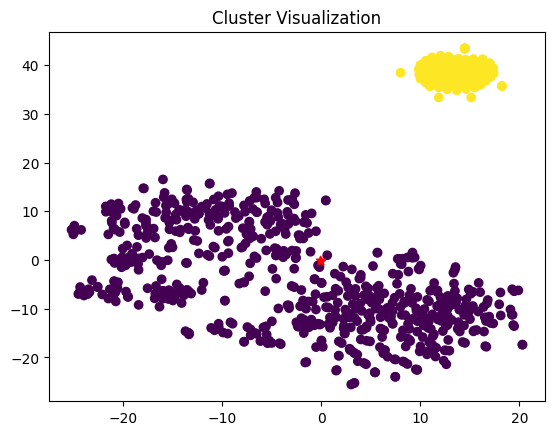

In [ ]:
# Use recluster function to refine the clustering
refined_y_predicted, refined_cluster_centers, refined_inertia = recluster(combined_embeddings, best_k)

# Evaluate the refined clustering using silhouette score, cohesion, and separation
refined_silhouette_avg = silhouette_score(combined_embeddings, refined_y_predicted)
refined_cohesion_avg = calculate_cohesion(combined_embeddings, refined_y_predicted)
refined_separation_avg = calculate_separation(combined_embeddings, refined_y_predicted)

print("Refined Silhouette score:", refined_silhouette_avg)
print("Refined Cohesion:", refined_cohesion_avg)
print("Refined Separation:", refined_separation_avg)
print("Refined Inertia:", refined_inertia)

# Visualize the refined clusters with centroids
visualize_clusters(combined_embeddings, refined_y_predicted, refined_cluster_centers)
